<a href="https://colab.research.google.com/github/JohannaBZ/FRedes/blob/master/Copia_de_workshop_crash_course_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CII.IA



In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


Clasificador de objetos usando una red preentrenada

1. Importa la red de imagenet conservando todas las capas
2. Prueba la predicción con 5 imagenes del internet


In [ ]:
%matplotlib inline
import os
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


!ls '/content/gdrive/My Drive/CII.IA'


In [10]:
!ls '/content/'

gdrive	  oso2.jpg  oso4.jpg  perro1.jpg  perro.jpg
oso1.jpg  oso3.jpg  oso.jpg   perro2.jpg  sample_data


In [11]:
import tensorflow as tf

In [12]:
from __future__ import division,print_function
#from importlib import reload
import os, json
from glob import glob
import numpy as np


np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
from numpy.random import random, permutation
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom

import keras
import tensorflow as tf
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers import Input, GlobalAveragePooling2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
#from keras.optimizers import SGD, RMSprop
from keras.preprocessing import image
from keras.utils.data_utils import get_file
from keras.callbacks import ModelCheckpoint

#
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from itertools import product

In [ ]:
keras.backend.clear_session()
sz=224
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=True, input_shape=(sz,sz,3))



In [42]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
img.size


In [20]:
#importing new images
from keras.preprocessing import image
from six.moves import urllib
#from PIL import Image

img=image.load_img('/content/perro.jpg', target_size=(224,224))
imgnew= np.expand_dims(img, axis=0)
imgnew=preprocess_input(imgnew)
preds = base_model.predict(imgnew)
#preds=np.argmax(probs)
#print(preds)

In [ ]:
print(np.argmax(preds))

335


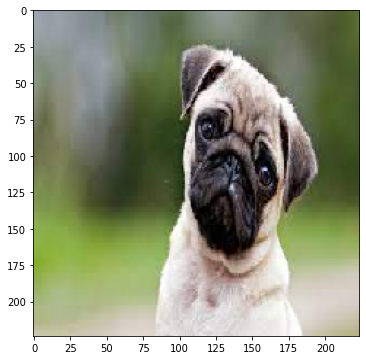

In [21]:
plt.figure(figsize=(9,6))
plt.imshow(img,cmap='gray')
plt.show()

In [22]:

print('Predicted:', decode_predictions(preds, top=2)[0])
npred=decode_predictions(preds, top=1)[0]


49152/35363 [=========================================] - 0s 0us/step
Predicted: [('n02110958', 'pug', 0.7691589), ('n02108422', 'bull_mastiff', 0.20174865)]


In [ ]:
##prueba con más imagenes

In [33]:
img=image.load_img('/content/oso4.jpg', target_size=(224,224))
imgnew= np.expand_dims(img, axis=0)
imgnew=preprocess_input(imgnew)
preds = base_model.predict(imgnew)

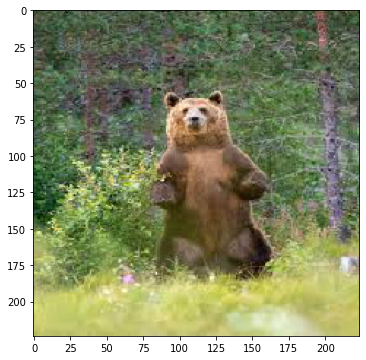

In [34]:
plt.figure(figsize=(9,6))
plt.imshow(img,cmap='gray')
plt.show()

In [35]:
#predicción
print('Predicted:', decode_predictions(preds, top=3)[0])
npred=decode_predictions(preds, top=1)[0]

Predicted: [('n02132136', 'brown_bear', 0.98010445), ('n02133161', 'American_black_bear', 0.008419163), ('n02396427', 'wild_boar', 0.003279343)]


In [40]:
img=image.load_img('/content/tomate.jpg', target_size=(224,224))
imgnew= np.expand_dims(img, axis=0)
imgnew=preprocess_input(imgnew)
preds = base_model.predict(imgnew)

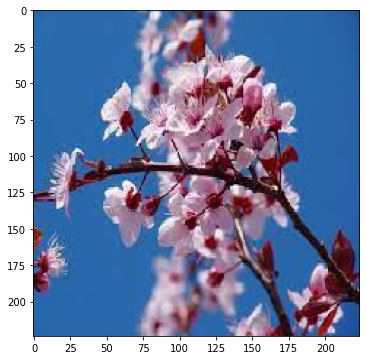

In [37]:
plt.figure(figsize=(9,6))
plt.imshow(img,cmap='gray')
plt.show()

In [38]:
#predicción
print('Predicted:', decode_predictions(preds, top=3)[0])
npred=decode_predictions(preds, top=1)[0]

Predicted: [('n01833805', 'hummingbird', 0.59810925), ('n02279972', 'monarch', 0.17101409), ('n02280649', 'cabbage_butterfly', 0.054680604)]
